In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data = pd.read_csv(r"C:\Users\user\Downloads\Cars (1).csv")

In [3]:
data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [5]:
data.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [6]:
data.duplicated().any()

False

In [7]:
data.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [8]:
data['HP'].value_counts()

92     7
115    5
102    5
95     5
100    4
165    4
140    4
73     3
90     3
55     3
130    3
162    2
70     2
62     2
84     2
78     2
81     2
175    1
238    1
120    1
263    1
280    1
322    1
245    1
295    1
150    1
49     1
145    1
96     1
160    1
180    1
98     1
93     1
103    1
52     1
74     1
66     1
80     1
53     1
236    1
Name: HP, dtype: int64

In [9]:
data.head(2)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833


<Axes: xlabel='WT', ylabel='HP'>

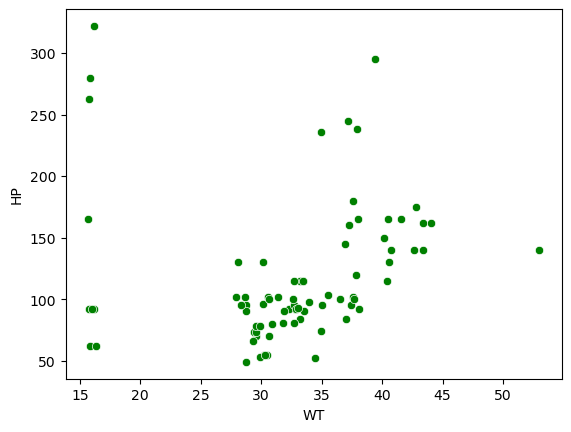

In [10]:
sn.scatterplot(x = 'WT' , y = 'HP' , data = data , color = 'green')

C:\Users\user\AppData\Local\Temp\ipykernel_20748\610801009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data['HP'] , color = 'red')


<Axes: xlabel='HP', ylabel='Density'>

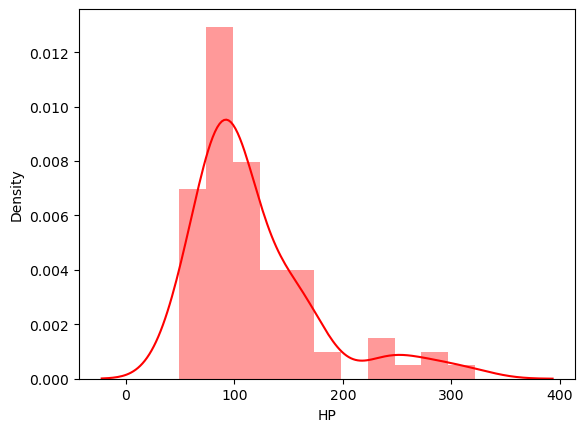

In [11]:
sn.distplot(data['HP'] , color = 'red')

<Axes: >

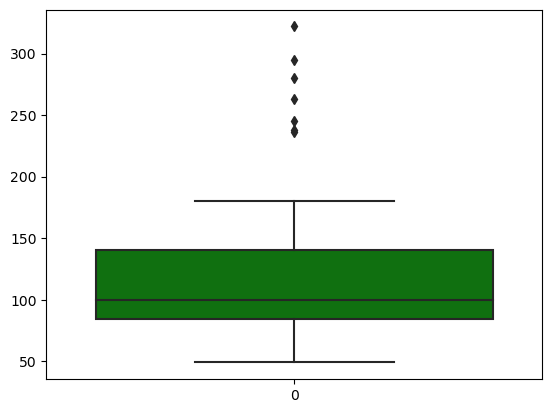

In [12]:
sn.boxplot(data['HP'] ,color = 'green')

{'whiskers': [<matplotlib.lines.Line2D at 0x15d4556ae60>,
 'caps': [<matplotlib.lines.Line2D at 0x15d4556b3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15d4556abc0>],
 'medians': [<matplotlib.lines.Line2D at 0x15d4556e710>],
 'fliers': [<matplotlib.lines.Line2D at 0x15d4556e9b0>],
 'means': []}

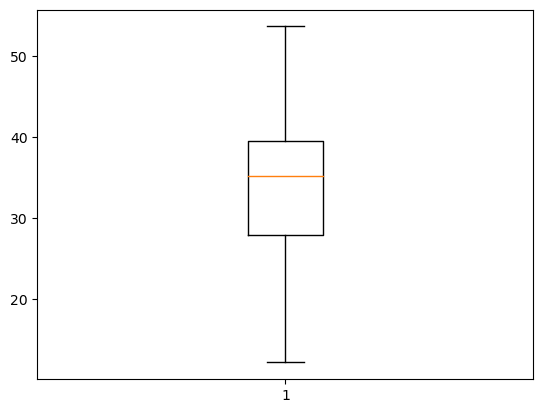

In [14]:
plt.boxplot(data['MPG'] )

{'whiskers': [<matplotlib.lines.Line2D at 0x15d455888b0>,
 'caps': [<matplotlib.lines.Line2D at 0x15d45588df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15d45588610>],
 'medians': [<matplotlib.lines.Line2D at 0x15d455a1420>],
 'fliers': [<matplotlib.lines.Line2D at 0x15d455a16c0>],
 'means': []}

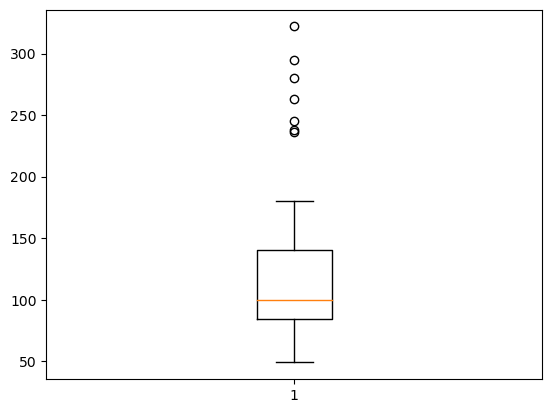

In [15]:
plt.boxplot(data['HP'])

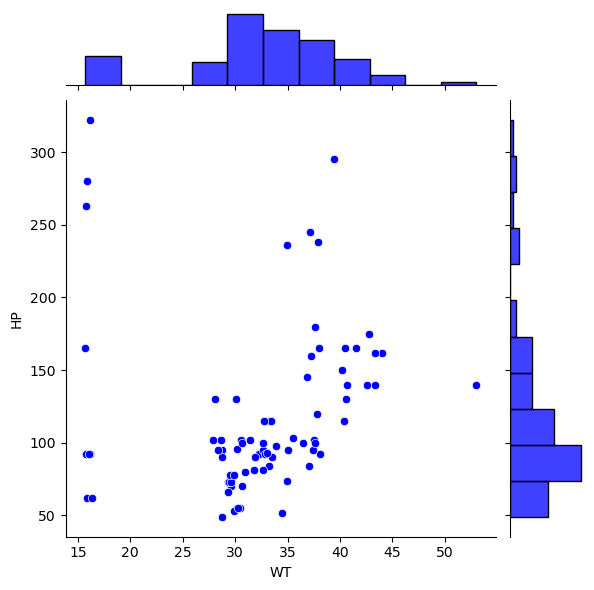

In [20]:
sn.jointplot(x = 'WT' , y = 'HP'  , data = data , color = 'blue')

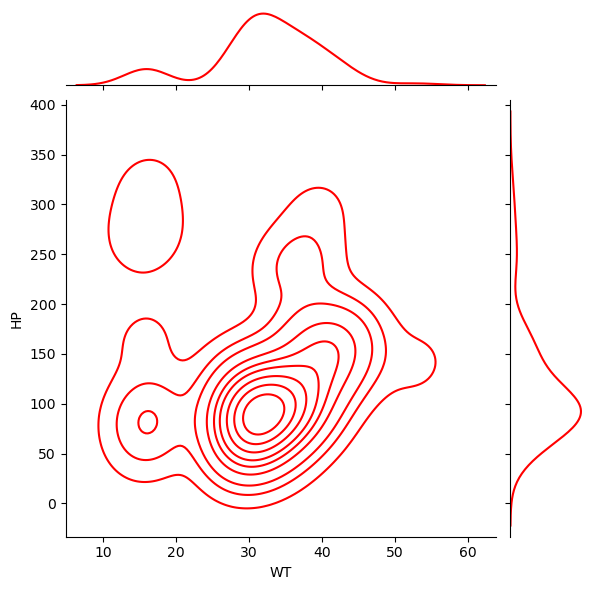

In [21]:
sn.jointplot(x = 'WT' , y =  'HP' , data = data , color = 'red' , kind = 'kde')

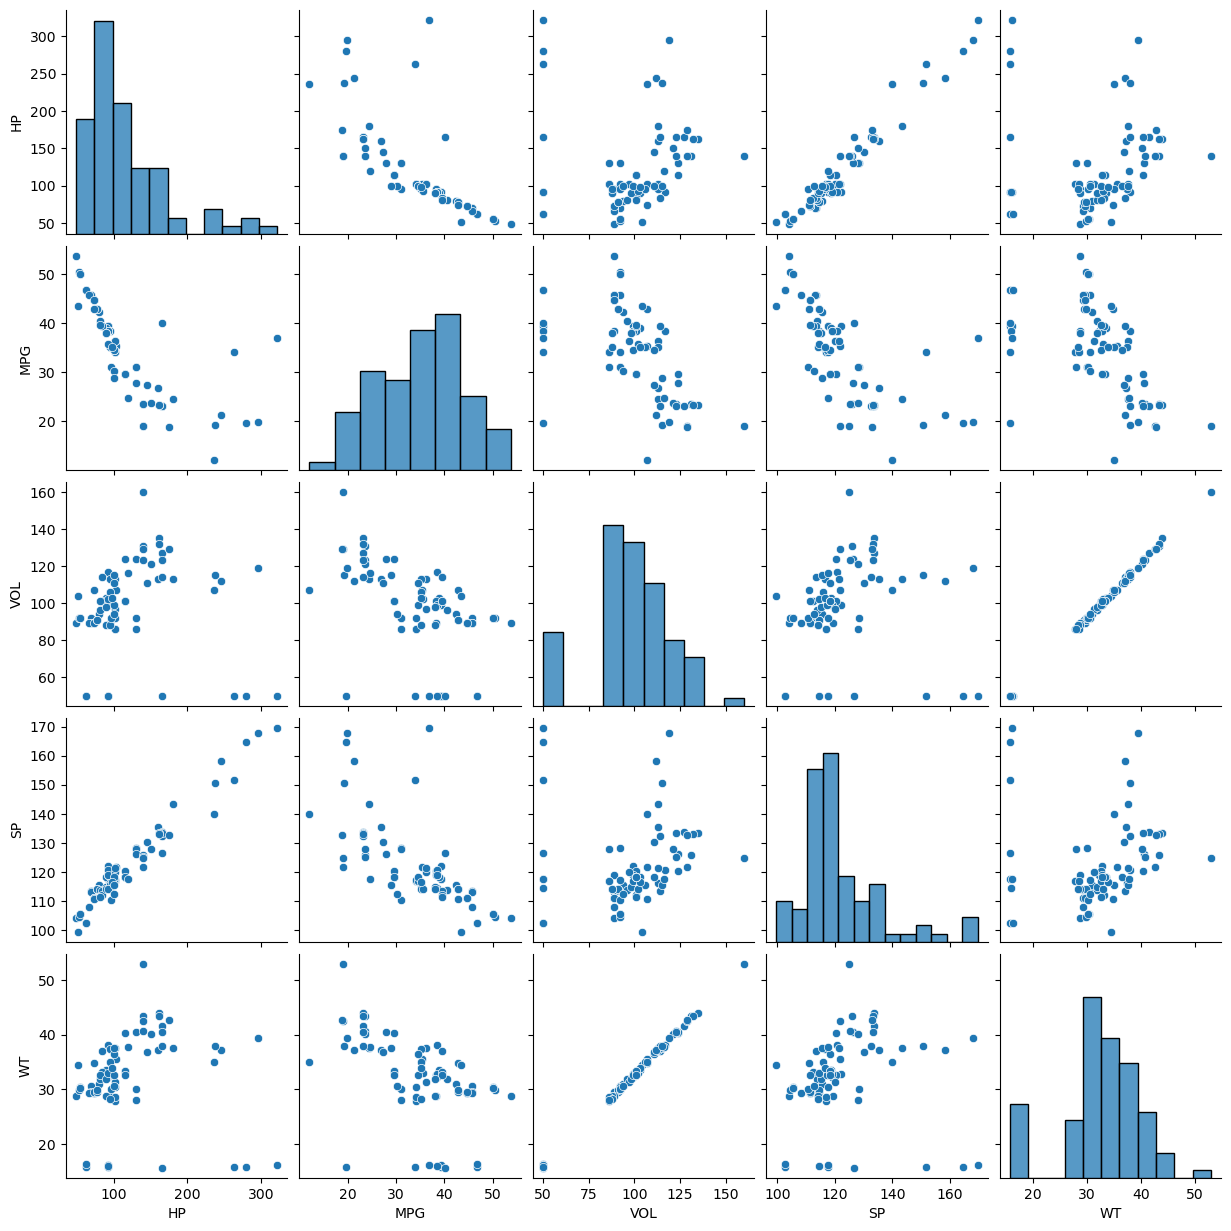

In [22]:
sn.pairplot(data)

In [23]:
data.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [24]:
model = smf.ols("MPG~HP+VOL+SP+WT" , data = data).fit()

In [25]:
model

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           1.54e-23
Time:                        22:55:31   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Residual Analysis using Q-Q plot

In [28]:
import statsmodels.api as sm

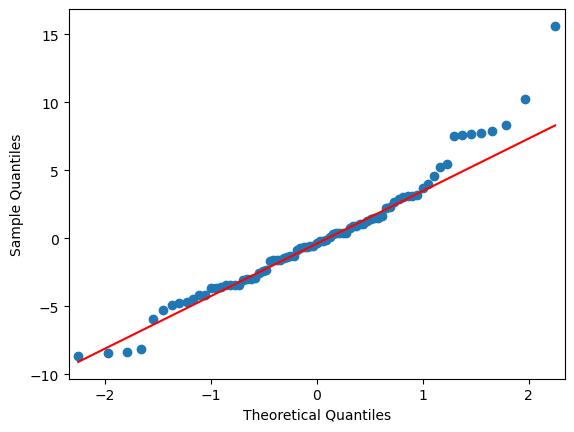

In [29]:
model_residual = sm.qqplot(model.resid , line = 'q')

## homoscadesticity for datasets

In [40]:
def get_standardized_val(vals):
    x = (vals - vals.mean())/vals.std()
    return(x)
    

Text(0, 0.5, 'model_resid')

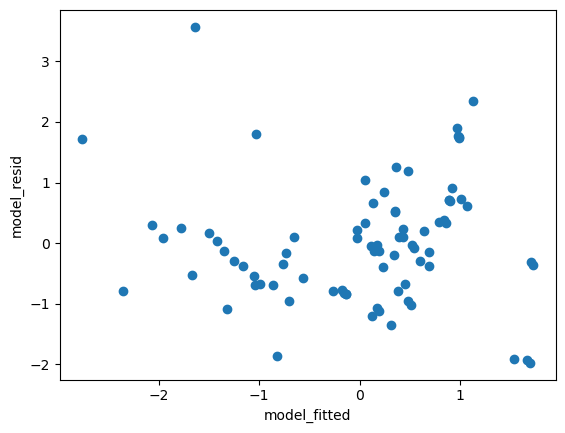

In [45]:
plt.scatter(get_standardized_val(model.fittedvalues) , get_standardized_val(model.resid))
plt.xlabel('model_fitted')
plt.ylabel('model_resid')

## Cooks Distance for outliers detections

In [46]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

Text(0, 0.5, 'distance')

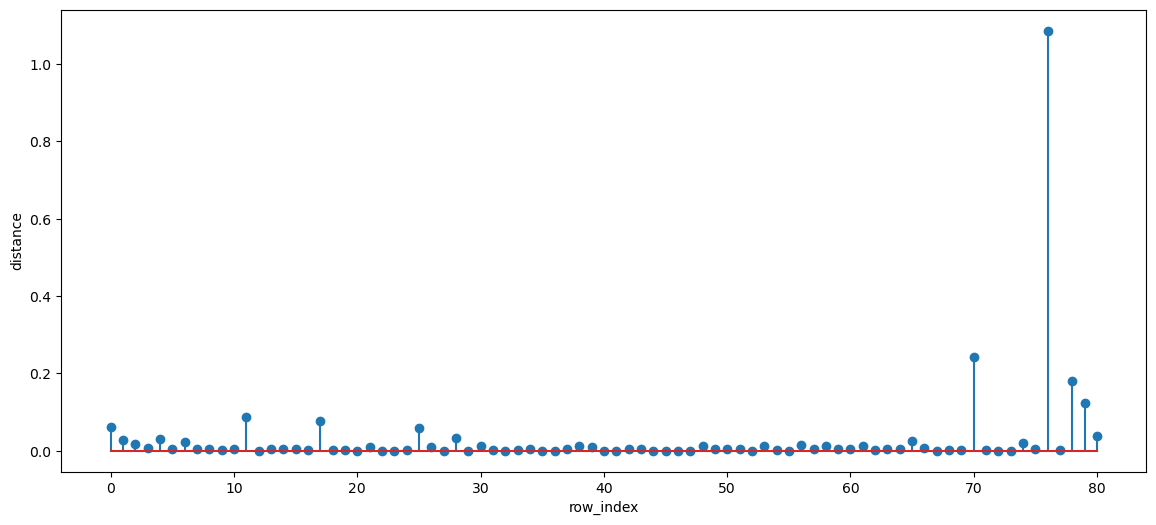

In [51]:
plt.subplots(figsize = (14,6))
plt.stem(np.arange(len(data)) , np.round(c, 3))
plt.xlabel('row_index')
plt.ylabel('distance')

In [61]:
from statsmodels.graphics.regressionplots import influence_plot

In [64]:
data.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


## Variance influence factor

In [79]:
r_sqr = smf.ols("MPG~HP+WT+SP+VOL" , data = data).fit().rsquared

In [80]:
r_sqr

0.842797577067815

In [81]:
vif_mpg = 1/1-r_sqr

In [82]:
vif_mpg

0.157202422932185

In [73]:
data = data.drop(index = [  70] , axis = 0)

In [74]:
data.tail(10)

,HP,MPG,VOL,SP,WT
68,165,23.103172,123,133.312342,40.472042
69,245,21.273708,112,158.300669,37.141733
71,162,23.203569,135,133.415985,44.013139
72,162,23.203569,132,133.140074,43.353123
73,140,19.086341,160,124.715241,52.997752
74,140,19.086341,129,121.864163,42.618698
75,175,18.762837,129,132.864163,42.778219
77,238,19.197888,115,150.576579,37.923113
79,295,19.833733,119,167.944460,39.423099
80,236,12.101263,107,139.840817,34.948615


In [76]:
data.reset_index()

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
73,74,140,19.086341,129,121.864163,42.618698
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,79,295,19.833733,119,167.944460,39.423099


In [83]:
model_mdf = smf.ols("MPG~HP+VOL+SP+WT" , data = data).fit()

In [84]:
model_mdf

In [85]:
model_mdf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     97.84
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           1.49e-28
Time:                        23:31:45   Log-Likelihood:                -210.68
No. Observations:                  78   AIC:                             431.4
Df Residuals:                      73   BIC:                             443.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1903     12.683      1.513      0.135      -6.087      44.467
HP            -0.2588      0.034     -7.619      0.000      -0.327      -0.191
VOL           -0.2811      0.476     -0.590      0.557      -1.230       0.668
SP             0.4944      0.135      3.668      0.000       0.226       0.763
WT             0.3953      1.423      0.278      0.782      -2.440       3.230
==============================================================================
Omnibus:                       13.155   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.126
Skew:                           0.917   Prob(JB):                     0.000856
Kurtosis:                       3.991   Cond. No.                     5.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Residual plots

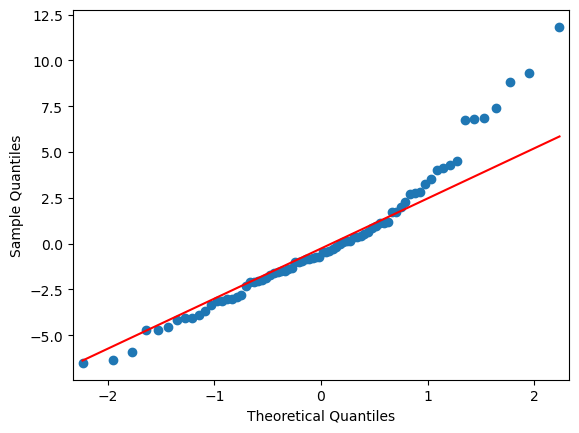

In [86]:
model_mdf_resid = sm.qqplot(model_mdf.resid , line = 'q')

In [87]:
model_mdf_influence = model_mdf.get_influence()
(C , _) = model_mdf_influence.cooks_distance

Text(0, 0.5, 'distance')

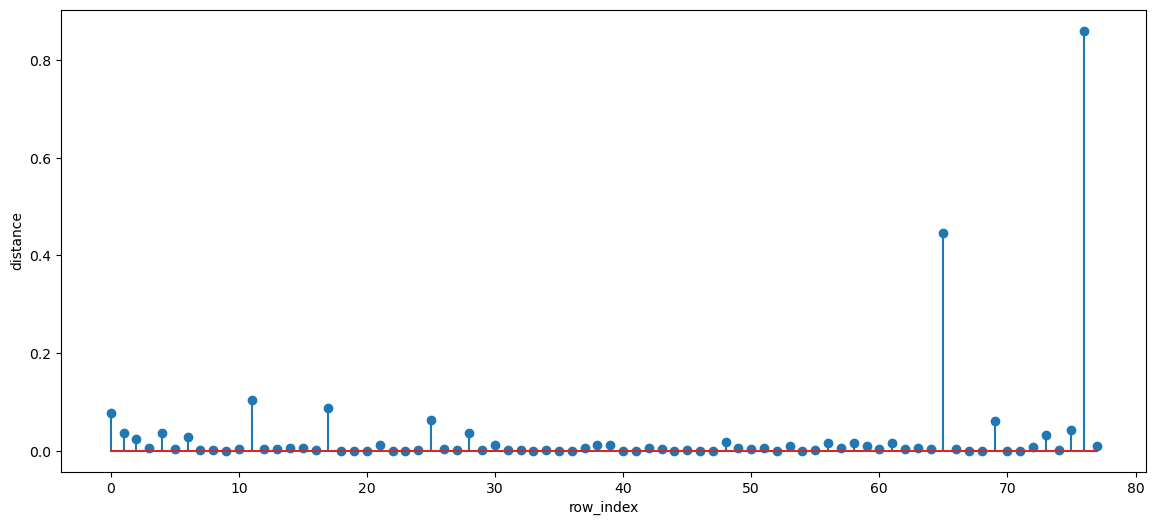

In [88]:
plt.subplots(figsize = (14,6))
plt.stem(np.arange(len(data)), np.round(C , 3))
plt.xlabel('row_index')
plt.ylabel('distance')

In [89]:
data.tail(5)

,HP,MPG,VOL,SP,WT
74,140,19.086341,129,121.864163,42.618698
75,175,18.762837,129,132.864163,42.778219
77,238,19.197888,115,150.576579,37.923113
79,295,19.833733,119,167.944460,39.423099
80,236,12.101263,107,139.840817,34.948615


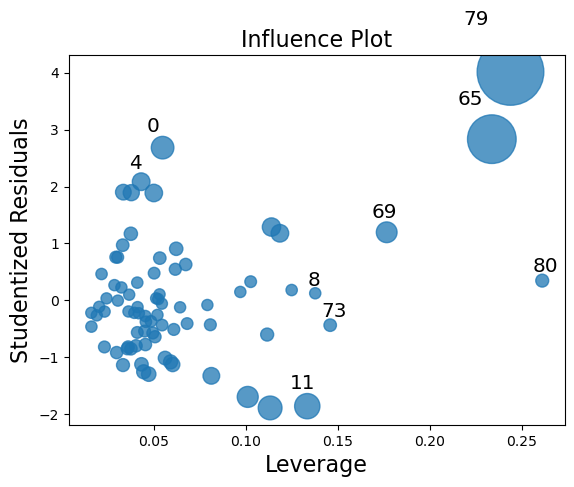

In [90]:
model_mdf_point = influence_plot(model_mdf)